# OpenCV : Recognize Dice

### Import resources

In [198]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [199]:
# Read in the image
image = cv2.imread('images/image 8.jpg')

# crop the box
image = image[:, 147:612]
        
# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)


This image is: <class 'numpy.ndarray'>  with dimensions: (480, 465, 3)


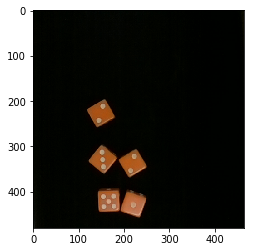

In [200]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

## Recognize 6 Dice

### Define the color threshold (mask)

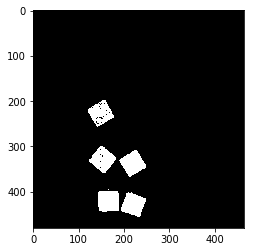

In [201]:
lower = np.array([104, 79, 11])
upper = np.array([255, 255, 255])

# Define the masked area
mask = cv2.inRange(image_copy, lower, upper)
plt.imshow(mask, cmap='gray')

### if needed: blur the image to hide noise

In [202]:
# mask =  cv2.bilateralFilter(mask,9,175,75)
# plt.imshow(mask, cmap='gray')

### find contours (dice)

In [203]:
_, contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

71


### keep only the contours that is greater of specific size (the minimum size of dice area)
##### * outout should be 6

In [204]:
# 1010101 is just a large number

def eliminate_contours(contours, area_lower_bound, area_upper_bound=1010101): 
    # get the area of all contours
    c_area = list(map(lambda arg: cv2.contourArea(arg), contours))
    print(sorted(c_area))

    # make tuple: (contour index, contour area) 
    c_area = list(enumerate(c_area))
    # print(c_area)

    # area_lower_bound: keep only the contours areas that is greater than area_lower_bound
    c_area = list(filter(lambda arg: area_upper_bound > arg[1] > area_lower_bound, c_area))
    # print(c_area)

    # keep only the contours that its index is same as the c_area indexes; c means one contour
    contours = [c for i, c in enumerate(contours) if i in np.array(c_area)[:,0]]
    print(len(contours))
    return contours

contours = eliminate_contours(contours, 1300)

[0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.5, 5.5, 5.5, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 12.0, 12.5, 26.5, 40.0, 60.0, 1912.5, 1936.5, 1937.5, 1953.0, 1964.0]
5


### draw 6 dice

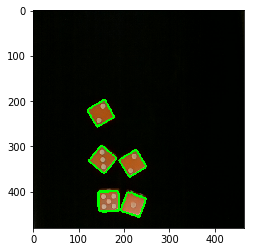

In [205]:
out = np.copy(image_copy)
out = cv2.drawContours(out, contours, -1, (0,255,0), 3)
plt.imshow(out)

## Recognize 1 Dice - isolate specific dice

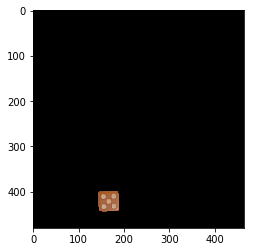

In [206]:
which_dice = 1    # from 0 to 5

dice = np.copy(image_copy)
shaded_dice = np.zeros_like(image_copy)
  
# shade the wanted pixel with red
cv2.drawContours(shaded_dice, contours, which_dice, 255, -1)
# plt.imshow(mask)

# maek all pixel black and keep the pixels of the shaded red area
dice[shaded_dice[:,:,0] != 255] = [0,0,0]   # NOTE: dice (3 channels)
                                            #       shaded_dice (1 channel; we only select the RED channel - to target 255)
plt.imshow(dice)

## Recognize Dot(s) in a Dice
### Define the color threshold (mask)

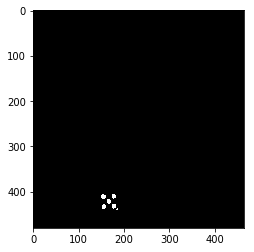

In [207]:
lower = np.array([160, 134, 82])
upper = np.array([255, 255, 255])

# Define the masked area
mask = cv2.inRange(dice, lower, upper)
plt.imshow(mask, cmap='gray')

### find contours - dot(s)

In [208]:
_, contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

6


### keep only the contours that is greater of specific size (the minimum size of a dot area)
##### * outout should from 1 to 6

In [209]:
contours = eliminate_contours(contours, 50, 70)

[7.5, 66.5, 70.0, 71.0, 71.0, 72.0]
1


# Resources

https://github.com/udacity/CVND_Exercises/blob/master/1_1_Image_Representation/1.%20Images%20as%20Numerical%20Data.ipynb

https://www.youtube.com/watch?v=hrwsHlKqBRw

https://www.youtube.com/watch?v=_aTC-Rc4Io0